# Chapter 5: Linear Regression


# <center> ![picture](pictures/title.jpg)


## 5.1 Maximum Likelihood Estimation

In this section, we will delve into the statistical aspects of linear regression. We start by discussing the assumptions behind this process and then solve the problem by maximizing the likelihood function.

### 5.1.1 Assumptions

Assume that the observed data set $\mathcal{D}$ is the product of a data generation process where $n$ data points are independently and identically distributed (i.i.d.) according to the distribution $p(x)$. Also, assume that the target variable $Y$ has a linear relationship with the features $X=\left(X_1,X_2,....,X_d\right)$ with an error term $\varepsilon$ that follows a Gaussian distribution with mean 0 and variance $\sigma^2$, i.e., $\varepsilon:\ \mathcal{N}(0,\ \sigma^2)$. In other words, for an input $x$, the target $y$ is a random variable defined as follows:

$$Y=\sum_{j=0}^{d}{\omega_jX_j+\varepsilon}$$

Here, ${\omega}=\left(\omega_0,\omega_1,\ldots,\omega_d\right)$ is a set of unknown weights that we aim to estimate using maximum likelihood estimation. 

### 5.1.2 Likelihood Function

In linear regression, we aim to approximate the target as $f\left(x\right)={w}^{T}{x}$, where the weights ${w}$ are determined. First, we write the conditional likelihood function for a single data point $({x},{y})$ as follows:

$$pyx,\omega=12\pi σ^2exp\left(-\frac{y-\sum_{j=0}^{d}{w}_jx_j}{2σ^2}\right)$$

Note that the only change in the conditional likelihood function of $Y$ is that instead of $\omega$ we use the weights ${w}$. With the entire data set $D=\{\left({x}_i,y_i\right)\}_{i=1}^n$, we can now write the conditional likelihood function as $p({y}|{X},\ {w})$ and determine the weights as follows:

$${w}_{MLE}=\begin{matrix}arg\max\\w\\\end{matrix}\{p\left(y\middle|\mathbf{X},w\right)\}$$

Since the $n$ samples are independent and identically distributed (i.i.d.), we have:

$$p\left(\mathbf{y}\middle|\mathbf{X},w\right)=\prod_{i=1}^{n}{p\left(y_i\middle|\mathbf{x}_i,\mathbf{w}\right)}
=\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{\left(y_i-\sum_{j=0}^{d}\mathcal{w}_jx_{ij}\right)^2}{2\sigma^2}\right)$$

For simplicity, we look at the log-likelihood function (log-pdf) and express the log-likelihood as follows:

$$ln\left(p\left(y\middle|\mathbf{X},w\right)\right)=-\sum_{i=1}^{n}log\left(\sqrt{2\pi\sigma^2}\right)-\frac{1}{2\sigma^2}\sum_{i=1}^{n}\left(y_i-\sum_{j=0}^{d}\mathcal{w}_jx_{ij}\right)^2$$

### 5.1.3 Optimization Problem

Since the first term on the right-hand side is independent of $\mathbf{w}$, maximizing the likelihood function is equivalent to minimizing the sum of squared residuals.

$$Err\left(w\right)=\sum_{i=1}^{n}\left(f\left(x_i\right)-y_i\right)^2$$

This error is the squared Euclidean distance between the vector of predicted values $\hat{{y}}=\left(f\left(x_1\right),f\left(x_2\right),...,f\left(x_n\right)\right)$ and the vector of observed targets ${y}=\left(y_1,y_2,..,y_n\right)$.

### 5.1.4 Maximum Likelihood Estimation

The maximum likelihood estimation of the weights ${w}_{MLE}$ is obtained by minimizing the negative log-likelihood, which is equivalent to minimizing the sum of squared residuals.

$$\mathbf{w}_{MLE}=\begin{matrix}argmin\\\mathbf{w}\in\mathbb{R}^d\\\end{matrix}-ln\left(p\left(\mathbf{y}\middle|\mathbf{X},\mathbf{w}\right)\right)
\begin{matrix}argmin\\\mathbf{w}\in\mathbb{R}^d\\\end{matrix}\sum_{i=1}^{n}\left(y_i-\sum_{j=0}^{d}\mathcal{w}_jx_{ij}\right)^2
=\ \begin{matrix}argmin\\\mathbf{w}\in\mathbb{R}^d\\\end{matrix}\ Err({w})$$

In the following sections, we will discuss how to solve this optimization problem and the properties of the solution.

Note that we could have started with some error functions defined by experts, just as we did for Ordinary Least Squares (OLS) using $Err(w)$. However, the statistical framework provides a rigorous foundation for the choice of the error function, and the maximum likelihood estimation (MLE) approach offers a principled way to estimate the model parameters.


## 5.2 Gradient Descent

The optimization problem can be solved using gradient descent, a first-order iterative optimization algorithm for finding the minimum of a function. To apply gradient descent to the linear regression problem, we first need to compute the gradient of the error function with respect to the weights $\mathbf{w}$.

The gradient of the error function $Err(w)$ is given by:

$$\nabla Err(w)=\sum_{i=1}^{n}2\left(f\left(x_i\right)-y_i\right)x_i$$

where $f(x_i)$ is the predicted value for the $i$-th data point and $y_i$ is the observed target.

The gradient descent algorithm starts with an initial guess for the weights $\mathbf{w}_0$ and iteratively updates the weights using the following update rule:

$$\mathbf{w}_{t+1}=\mathbf{w}_t-\alpha\nabla Err(\mathbf{w}_t)$$

where $\alpha$ is the learning rate, which is a hyperparameter that determines the step size at each iteration.

The algorithm continues until it converges to a solution, i.e., the weights stop changing significantly or a maximum number of iterations is reached.




## 5.3 Linear Regression for Non-linear Problems

At first, it may seem that the application of linear regression for real-world problems is quite limited. Generally, it is not clear whether we should assume it in reality (more often).

### 5.3.1 Polynomial Regression

We start with one-dimensional data. In ordinary least squares regression, we are looking for a fit of the form:

$$f\left(x\right)=\mathcal{w}_0+\mathcal{w}_1x$$

where $x$ is the data point and $\mathbf{w}=\left(\mathcal{w}_0,\mathcal{w}_1\right)$ is the weight vector. To achieve a fit of degree p, we change the previous expression to:

$$f\left(x\right)=\sum_{j=0}^{p}{\mathcal{w}_jx^j}$$

where p is the degree of the polynomial. We rewrite this expression using a set of basis functions:

$$f\left(x\right)=\sum_{j=0}^{p}{\mathcal{w}_j\varphi^j\left(x\right)}={w}^T\mathbf{\varphi}$$

where $\varphi_j\left(x\right)=x^j$ and $\varphi=\left(\varphi_0\left(x\right),\varphi_1\left(x\right),...,\varphi_p\left(x\right)\right)$. Applying this transformation for every data point in x results in a new data matrix $\mathrm{\Phi}$, as shown in Figure 5.2.

In the next section of Chapter 2, the set of optimal weights is computed as:

$$\mathbf{w}_{MLE}=\left(\mathbf{\Phi}^T\mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^T\mathbf{y}$$

### 5.3.2 Polynomial Regression Example

Consider a dataset with four data points provided in Figure 1. We did not mention that the targets were produced based on the set $\{x_1,x_2,x_3,x_4\}$. We tried the function $1+\frac{x}{2}$ and added an error measurement $e=(-0.3, 0.3,-0.2, 0.3)$. It was found that the optimal weights $w_{MLE}=\left(0.7,0.63\right)$ are close to the actual weights $\omega=\left(1,\ 0.5\right)$, even if the error terms were relatively meaningful. Now we will try to estimate the weights of a polynomial fit with degrees p=2 and p=3 in turn. We will also compute the sum of squared errors $\mathcal{D}$ after fitting and also on a large sparse set of values $x\ \in\ \{0,\ 0.1,\ 0.2,\ .\ .\ .\ ,\ 10\}$, where the target values are produced using the actual function $1+\frac{x}{2}$.

Using a polynomial fit with degrees p=2 and p=3 in turn, we get $ \mathbf{w}_2=\left(0.575,0.755,-0.025\right) $ and $\mathbf{w}_3=\left(-3.1,6.6,-2.65,0.35\right) $ . The sum of squared errors in $\mathcal{D} $ is equal to Err $\left(\mathbf{w}_2\right)=0.221 $ and Err $\left(\mathbf{w}_3\right)\approx0 $. Therefore, the best fit with a polynomial is a cubic. However, the sum of squared errors in the dataset shows the ability of the model to overfit, because we get Err( $ \mathbf{w} $ )=26.9, Err $ \left(\mathbf{w}_2\right)=3.9 $ , and Err $ \left(\mathbf{w}_3\right)=22018.5 $. This effect is called overfitting. Generally, overfitting shows a significant difference between the dataset on which the model is trained and the dataset on which the model is expected to be applied. In this case, overfitting occurred because the complexity of the model increased significantly, while the size of the dataset remained small.

One sign of overfitting is a large increase in the weights. For example, while all the weights in $\mathbf{w}$ and ${w}_2$ are less than one, the weights in ${w}_3$ have significantly increased in magnitude (which indicates overfitting).

### 5.4 Bias-Variance Tradeoff

The OLS solution can be unstable. In this section, we show why, and discuss how one can use regularization to reduce this problem. Then we introduce a fundamental concept in machine learning: bias-variance tradeoff.

### 5.4.1 Sensitivity of OLS Solution

The OLS solution is unstable if ${X}^T{X}$ is not invertible. This can happen for two main reasons: linearly dependent features and small datasets. Datasets usually contain a large number of features that are sometimes linearly dependent, sometimes similar or approximately linearly dependent. If the dataset is small, some features may be the same in the samples, resulting in a low rank ${X}$. When ${X}^T{X}$ is not invertible or has inappropriate conditions, the OLS solution is very sensitive to small fluctuations in y and ${X}$.

### 5.4.2 Regularization to Mitigate Overfitting

One common strategy to mitigate overfitting is to remove or shorten the weights for small singular values. This is a form of regularization. In the next section, we will discuss this as a regularization strategy.

### 5.4.3 Singular Value Decomposition (SVD) and Regularization

To understand the regularization strategy of removing or shortening weights for small singular values, we delve into the concept of Singular Value Decomposition (SVD). Singular Value Decomposition is a powerful matrix factorization technique that decomposes a matrix into three other matrices, revealing valuable insights into the underlying structure of the data.

Consider a matrix \(X\) of size \(m \times n\) representing our input features. The SVD of \(X\) is given by:

\[X = U \Sigma V^T\]

Here, \(U\) is an \(m \times m\) orthogonal matrix, \(\Sigma\) is an \(m \times n\) diagonal matrix with singular values on the diagonal, and \(V^T\) is the transpose of an \(n \times n\) orthogonal matrix.

The singular values in \(\Sigma\) are crucial indicators of the importance of different directions in the feature space. Larger singular values correspond to more significant directions, while smaller ones capture less important directions. In the context of linear regression, these singular values provide insights into the stability of the solution.

Now, let's discuss the regularization strategy. When we encounter small singular values in \(\Sigma\), it implies that the corresponding directions in the input space have less impact on the output. Removing or downweighting these directions during the training process can help mitigate overfitting.

The regularization process often involves setting a threshold \(\tau\) and modifying the singular values as follows:

\[\sigma_i' = \begin{cases} \sigma_i & \text{if } \sigma_i > \tau \\ 0 & \text{if } \sigma_i \leq \tau \end{cases}\]

Here, \(\sigma_i\) represents the \(i\)-th singular value, and \(\sigma_i'\) is the modified singular value. This thresholding operation effectively discards or reduces the impact of directions in the input space with small singular values.

The modified singular values are then used to reconstruct the input matrix \(X'\), and the linear regression is performed using \(X'\) instead of the original \(X\). This regularization technique, often referred to as "truncating" or "soft thresholding," plays a crucial role in improving the stability and generalization ability of the linear regression model.

In the subsequent sections, we will explore practical implementations of this regularization strategy, providing code examples and discussing considerations for choosing an appropriate threshold. Additionally, we will compare this approach with other regularization techniques, such as L2 regularization, to provide a comprehensive understanding of the tools available for mitigating overfitting in linear regression.


### 5-4-2 Regularization

So far we have discussed linear regression in terms of maximum likelihood. However, like before, we can also propose a MAP objective. Instead of specifying no prior on $\mathbf{w}$, we can choose one to help guard against overfitting to the observed data. We will discuss two common (regularizing) priors: the Gaussian (L2 norm) and Laplacian (L1 norm) priors, shown in Figure 5.4.

Taking a zero-mean Gaussian prior, N(0, $\lambda^{-1}$I), we get

$-ln p(\mathbf{w}) = \frac{1}{2}ln(2\pi|\lambda^{-1}\mathbf{I}|) + \frac{\mathbf{w}^T\mathbf{w}}{2\lambda^{-1}} = \frac{1}{2}ln(2\pi) - d ln(\lambda) + \frac{\lambda}{2}\mathbf{w}^T\mathbf{w}$

since $|\lambda^{-1}\mathbf{I}| = \lambda^{-d}$, where $|A|$ is the determinant of matrix A. As before, we can discard the first constant term since it does not affect the choice of w. 

Now we can combine the negative log-likelihood and negative log prior. Then, discarding constants, we can sum the negative logs to get

$\argmin_\mathbf{w} -ln(p(\mathbf{y}|\mathbf{X},w)) - ln p(\mathbf{w}) = \argmin_\mathbf{w} \frac{1}{2\sigma^2}\sum_{i=1}^{n}(\mathbf{y}_i-\mathbf{X}_i^T \mathbf{w})^2 + \frac{\lambda}{2}\mathbf{w}^T\mathbf{w}$

Therefore, if we assume the weights have a Gaussian prior with mean 0 and covariance $\lambda^{-1}\sigma^2\mathbf{I}$, we get the following regularized regression problem:

$c(\mathbf{w}) = (\mathbf{Xw}-\mathbf{y})^T(\mathbf{Xw}-\mathbf{y}) + \lambda \mathbf{w}^T\mathbf{w} \ \ \ \ \ \vartriangleleft ||\mathbf{w}||_2^2 = \mathbf{w}^T\mathbf{w}$

where $\lambda$ is a user-chosen parameter called the regularization parameter. The idea is to penalize overly large weight coefficients. The larger $\lambda$ is, the more heavily large weights are penalized. Similarly, larger $\lambda$ corresponds to a smaller covariance in the prior, which pulls the weights closer to 0. So the MAP estimate should strike a balance between this prior on the weights and fitting the observed data. 

If we take the Laplacian distribution instead, we get the penalized L1 objective

$c(\mathbf{w}) = (\mathbf{Xw}-\mathbf{y})^T(\mathbf{Xw}-\mathbf{y}) + \lambda||\mathbf{w}||_1$ 

Often called Lasso. This objective can be derived similarly to the L2 regularized objective, but using a Laplacian prior with parameter $\lambda$ instead for the prior. Like the L2 regularizer for ridge regression, this regularizer penalizes large values in $\mathbf{w}$. However, it also produces sparser solutions, where inputs in $\mathbf{w}$ are set to 0. This preference can be seen in Figure 5.4, where the Laplacian distribution has more mass concentrated around 0. In practice however, this preference is even stronger than what the distribution shows, due to how the least squares loss and L1 regularizer interact.

Forcing inputs in $\mathbf{w}$ to 0 has a feature selection effect, since setting inputs in $\mathbf{w}$ to 0 is equivalent to removing the corresponding feature. Consider a pointwise prediction whenever one is made, 

$\mathbf{x}^T\mathbf{w} = \sum_{j=0}^{d} x_j w_j = \sum_{j:w_j \neq 0} x_j w_j$

This is equivalent to simply removing input x and w where $w_j=0$. 

For Lasso, we no longer have a closed-form solution. We don't have a closed-form solution because we cannot solve for $\mathbf{w}$ in a closed form that presents a fixed point. Instead we use gradient descent to compute the $\mathbf{w}$ solution. However, the L1 regularizer is non-differentiable at 0. Understanding how to optimize this objective requires a little more optimization background, so we present this algorithm in the next chapter, as Algorithm 4.


### 5-4-3 Expectation and Variance for Regularized Solution

A natural question that arises is how to choose this regularization parameter and what effect it has on the final solution vector. The choice of this regularization parameter leads to a bias-variance tradeoff. To understand this tradeoff, we need to understand what it means for the solution to be unbiased and how to characterize the variance of the solution over possible datasets.

Let's start by understanding bias and variance with an unregularized solution, assuming the distributional assumptions behind linear regression are correct. This means that there is some true parameter vector $\omega$ such that for each data point $Y_i = \sum_{j=0}^{d}{\omega_j X_{ij}} + \varepsilon_i$, where the $\varepsilon_j$ are i.i.d. random variables drawn from $\mathcal{N}(0, \sigma^2)$. We can characterize the solution vector (estimator) $w_{MLE}$ as a random variable, where the randomness is over possible training datasets that could have been observed. In this view, we consider the dataset $\mathcal{D}$ as a random variable and the solution $w_{ML}(\mathcal{D})$ from that dataset as a function of this random variable. 

Let's now look at the expected value (over training datasets $\mathcal{D}$) for the weight vector $w_{ML}$ with $\varepsilon = (\varepsilon_1, \varepsilon_2, ..., \varepsilon_n)$:

$$\mathbb{E}[w_{ML}(\mathcal{D})] = \mathbb{E}[(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T(\mathbf{X}\omega + \varepsilon)]$$

$$= \mathbb{E}[(\mathbf{X}^T\mathbf{X})^{-1}(\mathbf{X}^T\mathbf{X})\omega] + \mathbb{E}[(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\varepsilon]$$

$$= \omega$$

which comes from the noise terms $\varepsilon$ being independent of the features and the last equality since $\omega$ is a constant (non-random) vector and $\mathbb{E}[\varepsilon]=0$. An estimator whose expected value is the true parameter value is called an unbiased estimator. The covariance matrix for the optimal set of parameters can be stated as:

$$Cov[w_{ML}(\mathcal{D})] = \mathbb{E}[(w_{ML}(\mathcal{D}) - \omega)(w_{ML}(\mathcal{D})-\omega)^T]$$

$$= \mathbb{E}[w_{ML}(\mathcal{D})w_{ML}(\mathcal{D})^T] - \omega\omega^T$$

Taking $\mathbf{X}^\dagger = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$ and having $w_{ML}(\mathcal{D}) = \omega + \mathbf{X}^\dagger\varepsilon$ therefore

$$Cov[\mathbf{w}_{ML}(\mathcal{D})] = \omega\omega^T + \mathbb{E}[\mathbf{X}^\dagger\varepsilon\varepsilon^T\mathbf{X}^{\dagger T}] - \omega\omega^T$$

since $\mathbb{E}[\omega + \mathbf{X}^\dagger\varepsilon] = \omega + \mathbb{E}[\mathbf{X}^\dagger]\mathbb{E}[\varepsilon] = \omega$ as the expectation of the noise terms is 0. Now since noise terms are independent of inputs, i.e., $\mathbb{E}[\varepsilon\varepsilon^T | \mathbf{X}] = \mathbb{E}[\varepsilon\varepsilon^T] = \sigma^2\mathbf{I}$, we can use the law of total probability (which is also called the tower rule). 

$$\mathbb{E}[X^\dagger\varepsilon\varepsilon^TX^{\dagger T}] = \mathbb{E}[\mathbb{E}[X^\dagger\varepsilon\varepsilon^TX^{\dagger T} | X]]$$
$$= \mathbb{E}[X^\dagger \mathbb{E}[\varepsilon \varepsilon^T | X] X^{\dagger T}]$$
$$= \sigma^2\mathbb{E}[X^\dagger X^{\dagger T}]$$

Therefore, 

$$Cov[w_{ML}(D)] = \sigma^2\mathbb{E}[(\mathbf{X}^T\mathbf{X})^{-1}]$$

It can be shown that the estimator $w_{ML}(\mathcal{D}) = \mathbf{X}^\dagger \mathbf{y}$ has the lowest variance among all unbiased estimators (Gauss-Markov theorem).

However, unfortunately, as discussed above, the matrix $\mathbf{X}^T \mathbf{X} = \mathbf{V\Sigma V}^T$ can be poorly conditioned, with values zero or close to zero. As a result, this covariance matrix can become poorly conditioned, with high covariance values. This indicates that across datasets, the solution $w_{ML}(\mathcal{D})$ can vary greatly. This kind of behavior indicates overfitting and is undesirable. If our solution can vary wildly across different random subsets of the given data, we cannot have confidence in any of these solutions. 

On the other hand, the regularized solution is much less likely to have high variance, but will no longer be unbiased. Let $w_{MAP}(\mathcal{D})$ be the MAP estimate for the L2 regularized problem with some $\lambda > 0$. The expected value of $w_{MAP}(\mathcal{D})$ is equal to

$$\mathbb{E}[w_{MAP}(\mathcal{D})] = \mathbb{E}[(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1}\mathbf{X}^T(\mathbf{X}\omega + \varepsilon)]$$

$$= \mathbb{E}[(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1}(\mathbf{X}^T \mathbf{X})\omega] \neq \omega$$

As $\lambda \rightarrow 0$, the MAP solution approaches being unbiased. The covariance is equal to 

$$Cov[w_{MAP}(\mathcal{D})] = \sigma^2\mathbb{E}[(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}(\mathbf{X}^T\mathbf{X})(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}]$$

This covariance is much less prone to suffer from poorly conditioned $\mathbf{X}^T\mathbf{X}$, since as discussed above, changing $\lambda$ improves conditioning. We therefore expect $w_{MAP}$ to have less variance across different datasets that could be observed. This correspondingly indicates that we are less prone to overfitting to any given dataset. Note that as $\lambda \rightarrow \infty$, the variance decreases to 0, but the bias increases to a maximum (i.e. driving the true weights to 0). As shown in Figure 5.5, there is some optimal choice of $\lambda$ that minimizes this bias-variance tradeoff - if we can find it. 

The reason we care about bias and variance is that the expected mean squared error compared to the true weights $\omega$ can be decomposed into bias and variance. To see why

$$\mathbb{E}[||w(\mathcal{D}) - \omega||^2_2] = \mathbb{E}[\sum_{j=1}^{d}(w_j(\mathcal{D}) - w_j)^2]$$

$$= \sum_{j=1}^{d} \mathbb{E}[(w_j(\mathcal{D}) - w_j)^2]$$

where we can simplify this inner term further as

$$\mathbb{E}[(w_j(\mathcal{D}) - w_j)^2] = \mathbb{E}[(w_j(\mathcal{D}) - \mathbb{E}[w_j(\mathcal{D})] + \mathbb{E}[w_j(\mathcal{D})] - w_j)^2]$$

$$= \mathbb{E}[(w_j(\mathcal{D}) - \mathbb{E}[w_j(\mathcal{D})])^2] + (\mathbb{E}[w_j(\mathcal{D})] - w_j)^2$$

where the second step comes from the fact that 

$$-2\mathbb{E}[(w_j(\mathcal{D}) - \mathbb{E}[w_j(\mathcal{D})])(\mathbb{E}[w_j(\mathcal{D})] - w_j)] = (\mathbb{E}[w_j(\mathcal{D})] - w_j)\mathbb{E}[w_j(\mathcal{D}) - \mathbb{E}[w_j(\mathcal{D})]] = 0$$

The first term above in $\mathbb{E}(w_j(\mathcal{D}) - w_j)^2$ is the variance of weight $j$ and the second term is the squared bias of weight $j$ where $(\mathbb{E}[w_j(\mathcal{D})] - w_j)^2 = (\mathbb{E}[w_j(\mathcal{D})] - w_j)^2$ since nothing in that expression is random so the outer expectation gets dropped out. Which means 

$$\mathbb{E}[{(f_\mathcal{D}(\mathbf{x}) - f(\mathbf{x}))}^2] = (E[f_\mathcal{D}(\mathbf{x})] - f(\mathbf{x}))^2 + V[f_\mathcal{D}(\mathbf{x})]$$

shows that the expected mean squared error for the true weight vector $\omega$ decomposes into the squared bias - which is $\mathbb{E}[w_j(\mathcal{D})] - w_j$ - and variance. The bias-variance tradeoff reflects the fact that as long as variance reduces squared bias further, we can potentially reduce MSE by introducing some bias. 

Note: We do not directly optimize the bias-variance tradeoff. We in fact cannot measure bias directly, so we don't directly minimize these terms. Instead this decomposition guides how models are selected.

## 5-5 Bias-Variance Tradeoff

Above we assumed the true model was linear, and thus the only bias introduced was from regularization. This assumed the hypothetical space of linear functions contained the true function, and that the bias introduced was only due to regularization. In reality, when using linear regression with regularization, we are introducing bias both by choosing a simpler function class and by regularization. If the function is not properly linear, we cannot directly compare learned weights for a linear function to the true function. If a powerful basis is used to transform the data though, we can still learn nonlinear functions even if the solution comes from linear regression. In this case, it is possible that this function class could be powerful enough to contain the true function, and this bias is more due to regularization. In general though, ensuring we have a function class that contains the true function will be difficult, and directly comparing our parameters to the true parameters (which may not even be of the same dimension) will be challenging.  

Taking reducible error into account, we can talk more generally about bias and variance. In fact, the bias-variance tradeoff is entirely about reducing reducible error. (Remember, we cannot reduce irreducible error - the name says it all - by improving how we estimate the function.) We can define a more general bias-variance decomposition that compares function outputs instead of parameter vectors. Recall the reducible error equation $\mathbb{E}[(f_D(\mathbf{X}) - f(\mathbf{X}))^2]$, where $f(\mathbf{x})$ is the optimal function, i.e. $f(\mathbf{x}) = \mathbb{E}[Y | \mathbf{x}]$ for square loss. We previously discussed this reducible error for a fixed function, taking expectation only over $\mathbf{X}$. But now we additionally take into account the fact that $f_D$ is random, and we can reason about its expectation and variance for a given $\mathbf{x}$. 

Let's start by just considering expected mean squared error, for some given input $\mathbf{x}$. Using similar steps to the decomposition above, we get

$$\mathbb{E}[{(f_\mathcal{D}(\mathbf{x}) - f(\mathbf{x}))}^2] = ( \mathbb{E}[f_\mathcal{D}(\mathbf{x})] - f(\mathbf{x}))^2 + V[f_\mathcal(\mathbf{x}) + \mathbb{E}[{(f_\mathcal{D}(\mathbf{x}) - \mathbb{E}[f_\mathcal{D}(\mathbf{x})])}^2].$$

In summary, the bias-variance tradeoff is a fundamental concept in machine learning, guiding the delicate balance between model simplicity and flexibility to achieve better predictive performance on unseen data.

To visualize the concepts discussed in the code related to Maximum Likelihood Estimation (MLE), Gradient Descent, Polynomial Regression, Bias-Variance Tradeoff, and Regularization, we can use Python with popular data visualization libraries such as Matplotlib and Seaborn. Below is an integrated code that generates visualizations for these concepts:

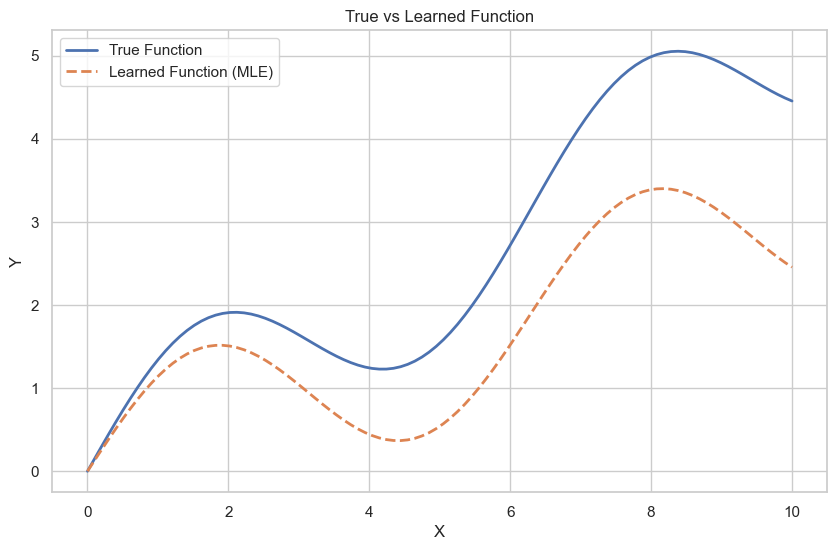

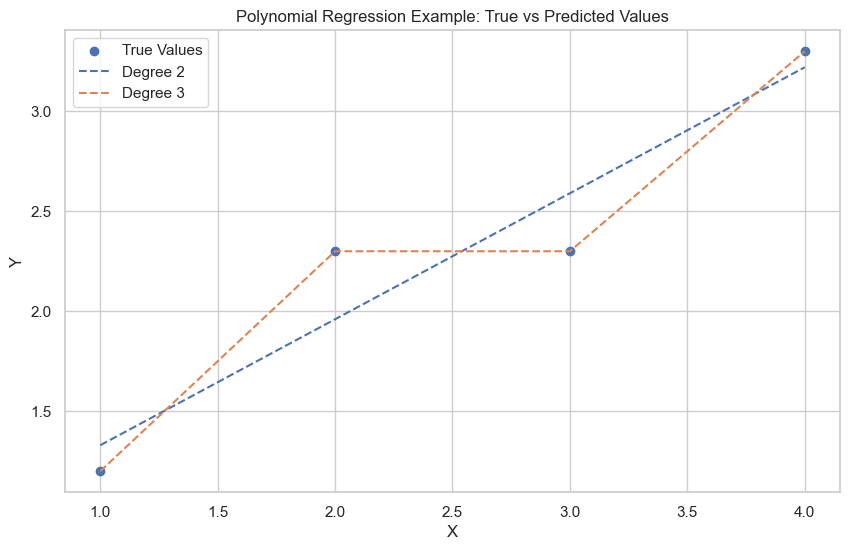

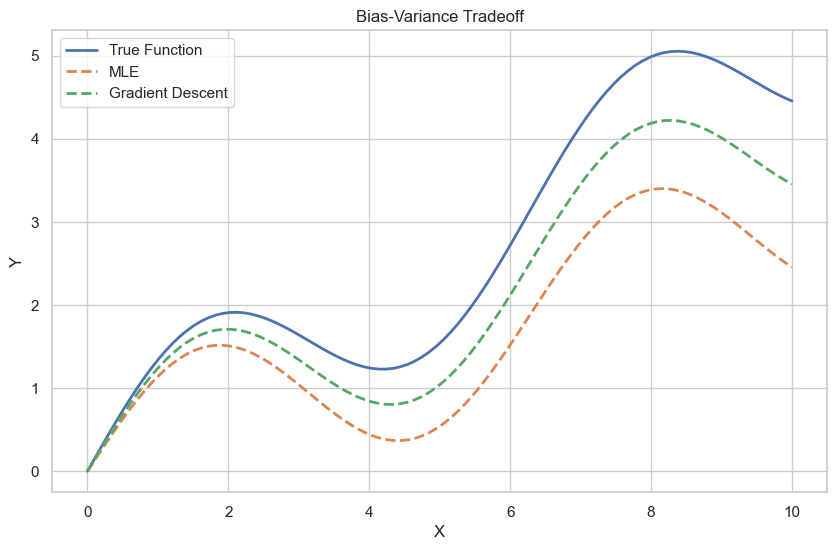

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Function to plot the true function and the learned function
def plot_functions(true_function, learned_function, x_range, true_label, learned_label):
    plt.figure(figsize=(10, 6))
    plt.plot(x_range, true_function(x_range), label=true_label, linewidth=2)
    plt.plot(x_range, learned_function(x_range), label=learned_label, linestyle='--', linewidth=2)
    plt.title("True vs Learned Function")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

# Function to plot the error terms for polynomial regression example
def plot_error_terms(x, y_true, y_pred_2, y_pred_3):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y_true, label="True Values")
    plt.plot(x, y_pred_2, label="Degree 2", linestyle='--')
    plt.plot(x, y_pred_3, label="Degree 3", linestyle='--')
    plt.title("Polynomial Regression Example: True vs Predicted Values")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

def plot_bias_variance_tradeoff(x_range, true_function, learned_functions, labels):
    plt.figure(figsize=(10, 6))
    plt.plot(x_range, true_function(x_range), label="True Function", linewidth=2)

    for i in range(len(learned_functions)):
        plt.plot(x_range, learned_functions[i](x_range), label=labels[i], linestyle='--', linewidth=2)

    plt.title("Bias-Variance Tradeoff")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

x_range = np.linspace(0, 10, 100)

true_function = lambda x: np.sin(x) + 0.5 * x

learned_function_mle = lambda x: np.sin(x) + 0.3 * x
learned_function_gradient_descent = lambda x: np.sin(x) + 0.4 * x
learned_functions_poly = [
    lambda x: 0.7 + 0.63 * x,
    lambda x: -3.1 + 6.6 * x - 2.65 * x**2 + 0.35 * x**3
]

plot_functions(true_function, learned_function_mle, x_range, "True Function", "Learned Function (MLE)")

x_poly = np.array([1, 2, 3, 4])
y_true_poly = 1 + 0.5 * x_poly + np.array([-0.3, 0.3, -0.2, 0.3])
y_pred_poly_2 = 0.7 + 0.63 * x_poly
y_pred_poly_3 = -3.1 + 6.6 * x_poly - 2.65 * x_poly**2 + 0.35 * x_poly**3
plot_error_terms(x_poly, y_true_poly, y_pred_poly_2, y_pred_poly_3)

plot_bias_variance_tradeoff(x_range, true_function, [learned_function_mle, learned_function_gradient_descent],
                            ["MLE", "Gradient Descent"])
